### DSC550
##### week6 project milestone 1, Author Xin Tang 4/20/24

Requirement:
1. Describing your original idea for the analysis/model building business problem. Clearly identify the problem you will address and the target for your model

2. Do a graphical analysis creating a minimum of four graphs

3. Write a short overview/conclusion of the insights gained from your graphical analysis.

###### Business idea/need

As a adult who is supporting college age children and do not have any financial support from anyone else, income is always a top weighted topic for my family. I am interested to know which factor may impact income most and how much the impacts are. This is also a topic impact anyone who has a job and want to make a decent living by earning income. 

After few rounds of search, I picked a dataset from kaggle, which is with income information and suitable for data mining/machine learning. 

This dataset originates from the 1994 Census Bureau database with information of adult (human being aged >16) income.
The income is categorized into 2 gourps ( >50K or <50K ). it also contains 11 independent variables like age, workclass, education and martial status etc. The only variable need to explain is fnlwgt: Final weight. This is an estimation of the number of people each observation in the dataset represents in the population. 

The problem I want to address is to build a model to predict income category using available independent variables in the dataset, speficially, predict if the income will be above or below 50K US dollar. Even the data is outdated and $50K is also an average income level for most people, I hope the model created can work on the newer data.  

With the problem defined as above and dataset selected, next step is data cleaning. I will exam and clean data as much as possible, remove any duplicate with no business impact, fill/replace NAs etc.  

Based on the findings from the first step, next step is basic data analysis and data visualization, I will find out the distribution of the independent variables, also try to find out correlation of the variables. several charts will be used to visualize the data distribution and their relationship. 

Next step is modelling. I will use the modeling techniques to build a model. several trials maybe needed to find out proper modelling. 

Last step is summarization/communication. I will summarize the findings and result of the model building and validation. 

###### Data checking and cleaning 

In [1]:
# Load packages first
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#load the data and validate success
df = pd.read_csv('adult income.csv')
df.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,native.country,income
0,17,Private,148522,11th,7,Never-married,occupation,Own-child,White,Male,United-States,<=50K
1,17,Private,93235,12th,8,Never-married,occupation,Own-child,White,Female,United-States,<=50K
2,17,Private,184924,9th,5,Never-married,occupation,Own-child,White,Male,United-States,<=50K
3,17,Private,116626,11th,7,Never-married,occupation,Own-child,White,Male,United-States,<=50K
4,17,Private,209949,11th,7,Never-married,occupation,Own-child,White,Female,United-States,<=50K


In [2]:
#check the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31947 entries, 0 to 31946
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             31947 non-null  int64 
 1   workclass       31947 non-null  object
 2   fnlwgt          31947 non-null  int64 
 3   education       31947 non-null  object
 4   education.num   31947 non-null  int64 
 5   marital.status  31947 non-null  object
 6   occupation      31947 non-null  object
 7   relationship    31947 non-null  object
 8   race            31947 non-null  object
 9   sex             31947 non-null  object
 10  native.country  31947 non-null  object
 11  income          31947 non-null  object
dtypes: int64(3), object(9)
memory usage: 2.9+ MB


In [3]:
# exam column and NA
print('variables with NA values', df.isna().sum())

variables with NA values age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
native.country    0
income            0
dtype: int64


In [4]:
# check if income is balanced.
count=len(df[df['income']=="<=50K"])
count1=len(df[df['income']==">50K"])
print('high/low income sample ratio is:', round(count1/count,2))

high/low income sample ratio is: 0.32


In [8]:
# the income sample is not balanced.

In [5]:
# Replace '?' with 'unknown' in work class, rename column name with dot
df['workclass'].replace('?', 'unknown', inplace=True)
df['occupation'].replace('?', 'unknown', inplace=True)
df.rename(columns = {'education.num':'education_len'}, inplace = True) 
df.rename(columns = {'marital.status':'marital_status'}, inplace = True) 
df.tail()

,age,workclass,fnlwgt,education,education_len,marital_status,occupation,relationship,race,sex,native.country,income
31942,90,unknown,175444,7th-8th,4,Separated,unknown,Not-in-family,White,Female,United-States,<=50K
31943,90,Federal-gov,195433,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
31944,90,Private,47929,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,<=50K
31945,90,unknown,313986,HS-grad,9,Married-civ-spouse,unknown,Husband,White,Male,United-States,>50K
31946,90,Private,313749,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K


In [6]:
# now Split our data set into categorical and numerical for data analysis
# from above analysis, the age, fnlwgt and education_len are numerical columns
# the rest columns (workclass, education, martial_status, income etc.) are categorical
num=df.select_dtypes(include=np.number)
cat=df.select_dtypes(exclude=np.number)

In [7]:
# to avoid duplicate work on next milestone submission, export the cleaned df to csv for next milestone use. 
df.to_csv('income_MS1.csv')

###### Data visualization

Text(0, 0.5, 'final weight')

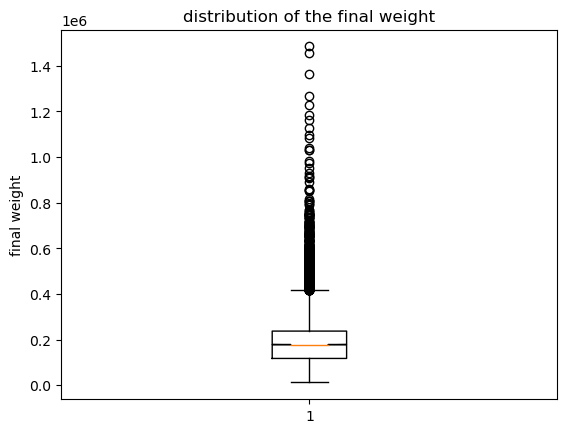

In [14]:
# box chart of fnlwight (final weight)
plt.boxplot(df.fnlwgt, notch=True)
plt.title('distribution of the final weight')
plt.ylabel('final weight')

###### looks like most observation are within 10-30% of the population.

Text(0.5, 1.0, 'Race distribution')

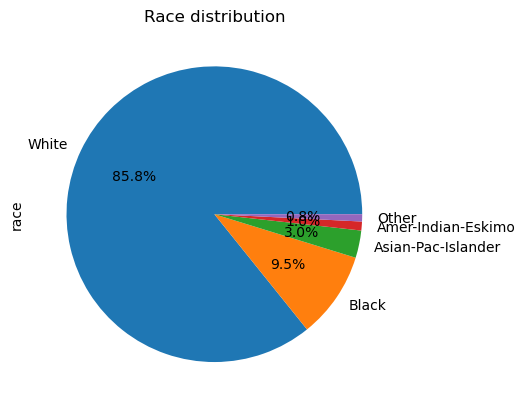

In [15]:
# pie chart of the race
data =df.race.value_counts()

data.plot(kind='pie', autopct='%0.1f%%')
plt.title('Race distribution')

###### from the pie chart, it is clear that the sampling among races are imbalanced. Even white is dominating race in real life, 86% is still much higher than realistic distribution. (per census, 73.6% of us population are white in 1995)

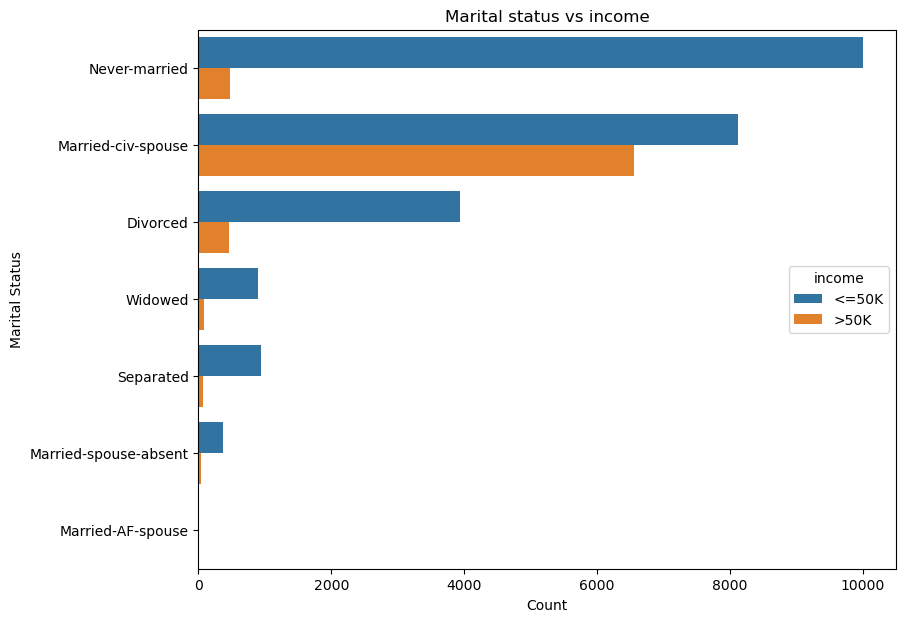

In [22]:
# distribution chart between marital status vs income
plt.figure(figsize=(9,7))
ax = sns.countplot(data=df, y='marital_status', hue='income')

plt.xlabel('Count')
plt.ylabel('Marital Status')
plt.title('Marital status vs income')

# Add legend
plt.legend
sns.move_legend(ax, "center right")

# Show the plot
plt.show()

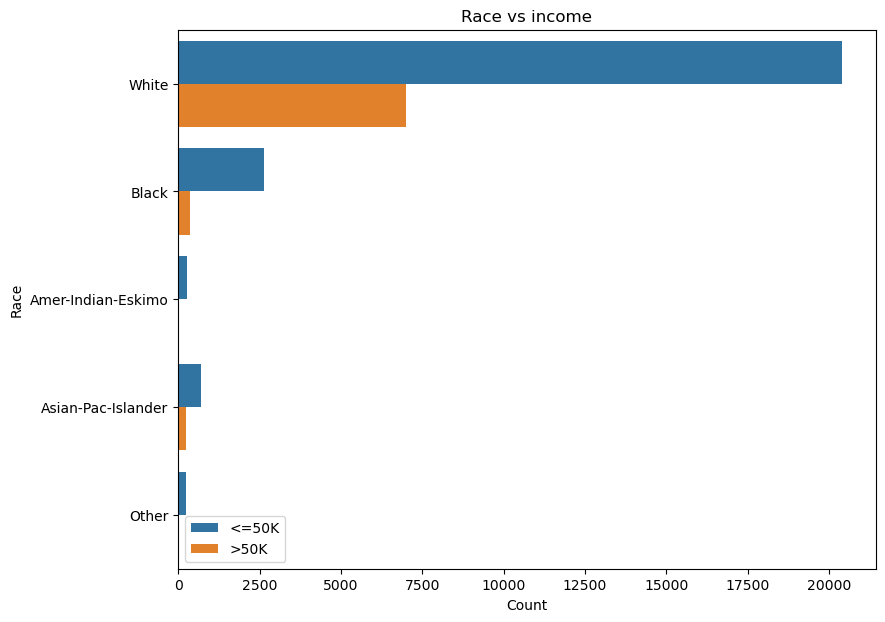

In [26]:
# Check income level among race
plt.figure(figsize=(9,7))
sns.countplot(data=df, y='race', hue='income')

plt.xlabel('Count')
plt.ylabel('Race')
plt.title('Race vs income')

# Add legend
plt.legend()

# Show the plot
plt.show()

###### From the 2 charts above, looks like most often white race earn higher income than any other races. Among the white, the married couple have most chance to have high income (> 50K dollars)

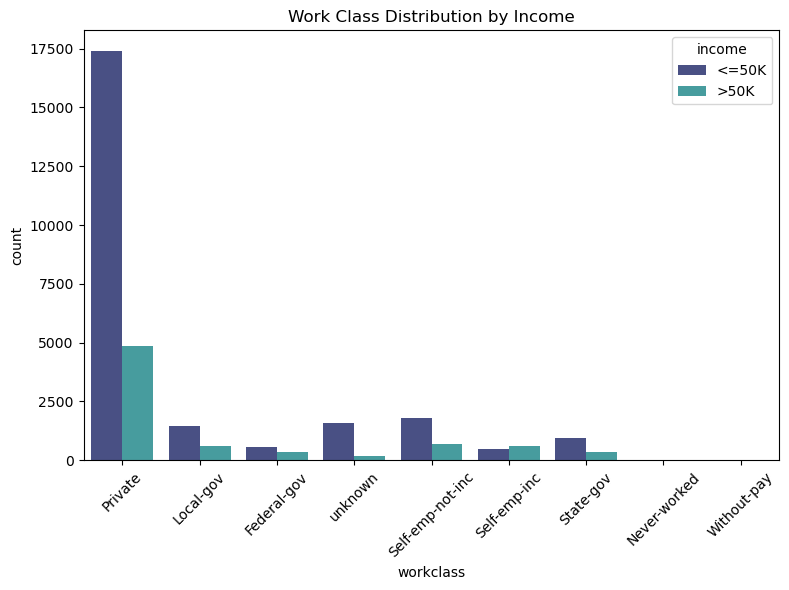

In [24]:
# plot work class distribution by income
plt.figure(figsize = (8,6))
sns.countplot(data = df, x = "workclass", hue = "income", palette = "mako")
plt.xticks(rotation = 45)
plt.title("Work Class Distribution by Income")
plt.tight_layout();

###### From the chart above, private business owner are most likely earn >50K.

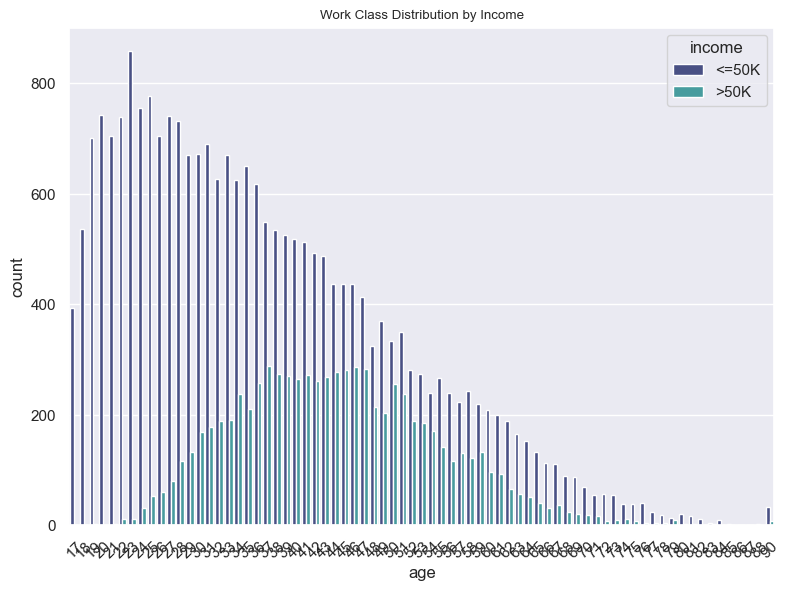

In [40]:
# plot age distribution by income
plt.figure(figsize = (8,6))
sns.countplot(data = df, x = "age", hue = "income", palette = "mako")
plt.xticks(rotation = 45)
sns. set(font_scale= 0.8)
plt.title("Work Class Distribution by Income")
plt.tight_layout();

###### from the chart above, high income often show in middle age (age between 30 to 50)